Phase space flow

Text(0, 0.5, '$\\nu$')

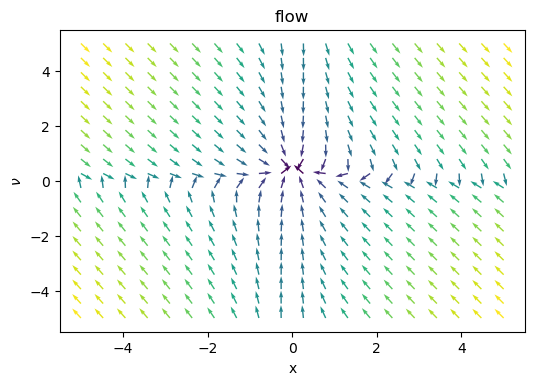

In [1]:
import numpy as np 
import matplotlib.pyplot as plt


## HERE PARAMETERS

a = 0.5
grid = 20


x = np.linspace(-5,5,grid)
y = np.linspace(-5,5,grid)
rx,ry = np.meshgrid(x,y)


### HERE SYSTEM

def bla(x,y):
    dx = x**2*y-x
    dy = a-x**2*y-y
    return np.array([dx,dy])

flowx, flowy = bla(rx,ry)

plt.figure(dpi=100)
plt.title("flow")
N = np.sqrt(flowx**2 + flowy**2)
N[N==0] = np.nan
plt.quiver(rx, ry, flowx/N, flowy/N, np.log(N))
plt.xlabel("x")
plt.ylabel(r"$\nu$")

Noisy flow

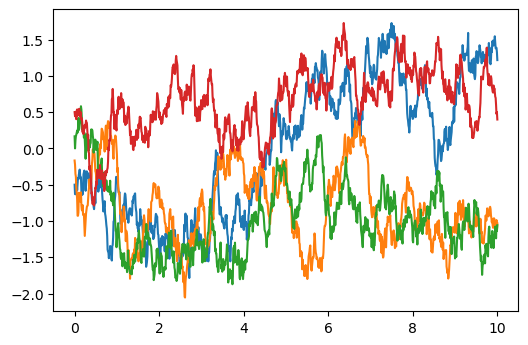

In [24]:
import numpy as np
import matplotlib.pyplot as plt


## HERE PARAMETERS
dt = 1e-4
sig = 1 ##noise strength

def em_step(t, y, dt, f, G): ##same as in example
    
    DW = np.random.normal(size=len(y))    
    return y + f(t,y)*dt + np.dot(G(t,y), DW) * np.sqrt(dt)

def eulermaruyama(t_list, y0, dt_max, f, G):
    y_list = np.zeros((len(t_list), len(y0))) # List of results
    
    t = 0 # Current simulation time
    y = y0
    
    for i, T in enumerate(t_list):
        
        while(t < T):            
            # Determine time step. Either dt_max, or shorter to
            # hit the next output point.
            dt = min(T-t, dt_max)
            y = em_step(t, y, dt, f, G)
            t += dt
            
        y_list[i,:] = y
        
    return y_list


##HERE NORMAL FUNCTION

def f(t,y): 
    return y[0]-y[0]**3



##HERE NOISE FUNCTION (usually just squareroot of diff coefficient)

def G(t,y): 
    return sig

y0 = np.linspace(-0.5,0.5,4) ##plot 4 trajectories
t = np.linspace(0,10,1000)

plt.figure(dpi=100)
for val in y0:
    vall = np.array([val])
    y = eulermaruyama(t, vall, dt, f, G)
    plt.plot(t, y)


ODE INTEGRATION

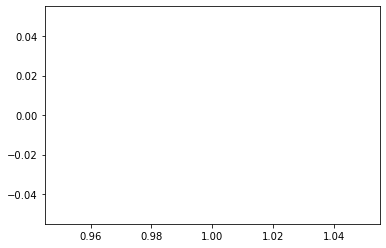

In [39]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def system(y, t):
    dx = y[1]
    dy = y[0]-y[0]**3
    return [dx, dy]

y0 = [1, 0]
t = np.linspace(0,30,100)

y = odeint(system, y0, t).T
plt.plot(y[0],y[1])

Piecewise maps

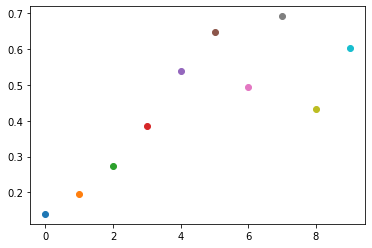

In [20]:
import numpy as np
import matplotlib.pyplot as plt

r = 1.4
x = 0.9

def mapp(x):
    if x < 0.5:
        return r*x
    else:
        return r*(1-x)
    
for i in range(10):
    x = mapp(x)
    plt.scatter(i,x)